In [1]:
import numpy as np
import matplotlib.pyplot as plt

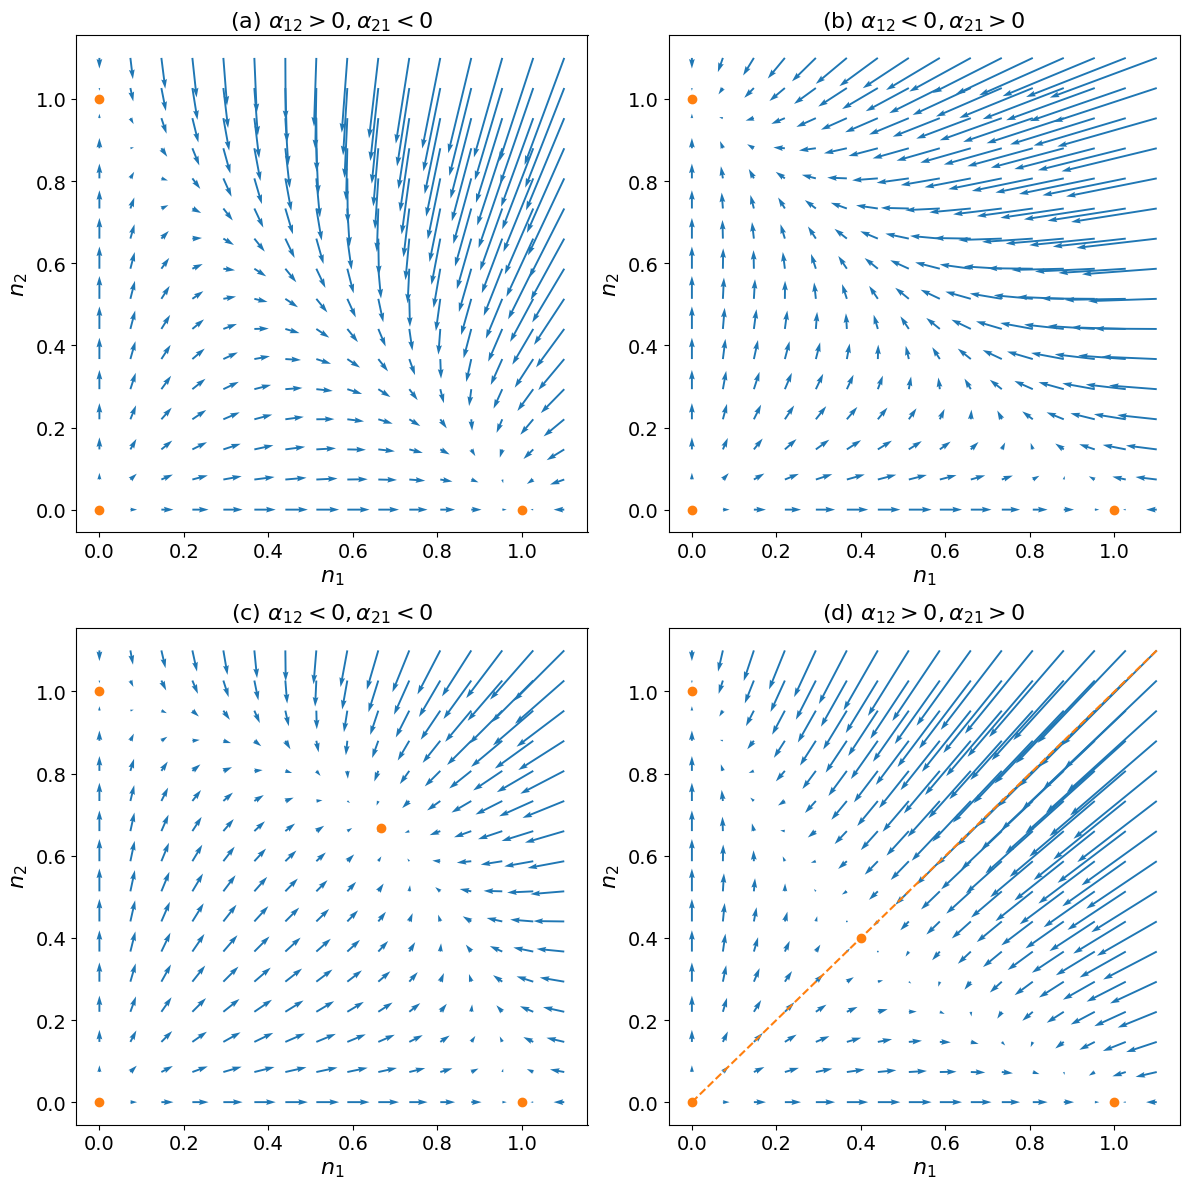

In [2]:
def transform(u, v):
    arrow_lengths = np.sqrt(u*u + v*v)
    len_adjust_factor = np.log(arrow_lengths + 1) / (arrow_lengths+1e-10)
    return u*len_adjust_factor, v*len_adjust_factor

# Setup common parameters
domain = (0, 1.1)
X = np.linspace(domain[0], domain[1], 16)
Y = np.linspace(domain[0], domain[1], 16)
x, y = np.meshgrid(X, Y)

# Define configurations for each subplot
configs = [
    {'idx': (0, 0), 'alpha12': 0.5, 'alpha21': 1.5, 'points': ([0, 1, 0], [0, 0, 1]), 'title': r'(a) $\alpha_{12}>0, \alpha_{21}<0$', 'line': False},
    {'idx': (0, 1), 'alpha12': 1.5, 'alpha21': 0.5, 'points': ([0, 1, 0], [0, 0, 1]), 'title': r'(b) $\alpha_{12}<0, \alpha_{21}>0$', 'line': False},
    {'idx': (1, 0), 'alpha12': 0.5, 'alpha21': 0.5, 'points': ([0, 1, 0, 2/3], [0, 0, 1, 2/3]), 'title': r'(c) $\alpha_{12}<0, \alpha_{21}<0$', 'line': False},
    {'idx': (1, 1), 'alpha12': 1.5, 'alpha21': 1.5, 'points': ([0, 1, 0, .4], [0, 0, 1, .4]), 'title': r'(d) $\alpha_{12}>0, \alpha_{21}>0$', 'line': True}
]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Plot each subplot
for config in configs:
    U = x * (1 - x - config['alpha12'] * y)
    V = y * (1 - y - config['alpha21'] * x)
    U2, V2 = transform(U, V)
    
    idx = config['idx']
    ax[idx].quiver(X, Y, U2, V2, color='C0', scale=5)
    ax[idx].scatter(config['points'][0], config['points'][1], color="C1")
    
    if config['line']:
        ax[idx].plot([0, 1.1], [0, 1.1], "--", color="C1")
    
    ax[idx].set_xlabel(r'$n_1$', fontsize=16)
    ax[idx].set_ylabel(r'$n_2$', fontsize=16)
    ax[idx].set_title(config['title'], fontsize=16)
    ax[idx].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
plt.savefig("PDFs/fig-13.01.pdf")
plt.savefig("PNGs/fig-13.01.png")